<a href="https://colab.research.google.com/github/kbosshart/GTown---ANLY590/blob/master/ANLY590_HW1(keb289).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 1
## ANLY-590 Fall 2019
### Kate Bosshart | KEB289@Georgetown.edu


---



# **1. Regularization** 
Using the accompanying Hitters dataset, we will explore regression models to predict a player's Salary from other variables.

In [0]:
# Import Libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error

In [0]:
# Provide the path for the CSV file in Github
url = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'

In [6]:
# Read in the Hitters data from this location and print out an extract
data = pd.read_csv(url, index_col=0)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [7]:
# Remove missing data from the Hitters Dataset
complete_data = pd.read_csv(url, index_col=0).dropna()
complete_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [0]:
# Investigative Plots: Create scatterplots of some avialable features and Salary 
def scatter_plot(feature, target):
    plt.figure(figsize=(3, 3))
    plt.scatter(
        complete_data[feature],
        complete_data[target],
        c='blue'
    )
    plt.suptitle("Plot of Hitter Salary", fontsize=10)
    plt.xlabel("{}".format(feature), fontsize=10)
    plt.ylabel("Salary ($)", fontsize=10)
    plt.show()

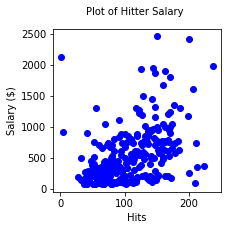

In [9]:
scatter_plot('Hits', 'Salary')

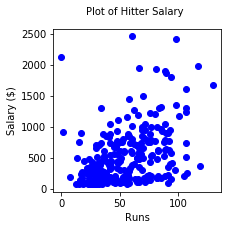

In [10]:
scatter_plot('Runs', 'Salary')

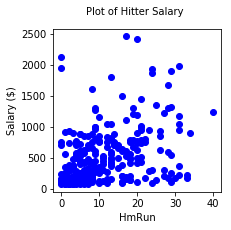

In [11]:
scatter_plot('HmRun', 'Salary')

**1.1** 
Use LASSO regression to predict Salary from the other numeric predictors. 

In [0]:
# Split out the Predictors and our Response Variable, Salary
Predictors = complete_data.drop(['Salary'], axis=1)
Salaries = complete_data['Salary'].values.reshape(-1,1)

y = Salaries

In [13]:
# Create dummy variables for the character predictors - League, Division, and New League
dummies = pd.get_dummies(Predictors[['League', 'Division', 'NewLeague']])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
-Alan Ashby,0,1,0,1,0,1
-Alvin Davis,1,0,0,1,1,0
-Andre Dawson,0,1,1,0,0,1
-Andres Galarraga,0,1,1,0,0,1
-Alfredo Griffin,1,0,0,1,1,0


In [14]:
# Update character fields with dummy variables in our Predictors
Predictors = Predictors.drop(['League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([Predictors, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)  # Use just one of the dummy vars for each

X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
-Alan Ashby,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
-Alvin Davis,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
-Andre Dawson,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
-Andres Galarraga,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
-Alfredo Griffin,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [0]:
# Create 100 alpha parameters to tune model
alphas = 10**np.linspace(start=10, stop=-2, num=100)*0.5  # Return evenly spaced numbers over a specified interval.
#alphas

In [0]:
# Split out data into Test and Training Datasets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [0]:
lasso = Lasso(max_iter = 10000, normalize = True)
coeffs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coeffs.append(lasso.coef_)

In [18]:
lassopred = lasso.predict(X_test)

print(pd.Series(lasso.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, lassopred))     # Calculate the test MSE

AtBat          -272.167686
Hits            208.356368
HmRun           -36.028813
Runs             -4.712521
RBI              98.847190
Walks            82.484879
Years            42.228630
CAtBat        -1340.765656
CHits          1328.878525
CHmRun          240.137760
CRuns           113.877820
CRBI           -164.885550
CWalks           32.015665
PutOuts         125.929465
Assists          64.829111
Errors          -37.217054
League_N         65.353617
Division_W      -57.121386
NewLeague_N     -39.868372
dtype: float64
11787020747676.246


In [19]:
np.shape(coeffs)

(100, 19)

Text(0.5, 0.98, 'Visualization of Coefficient Trajectories')

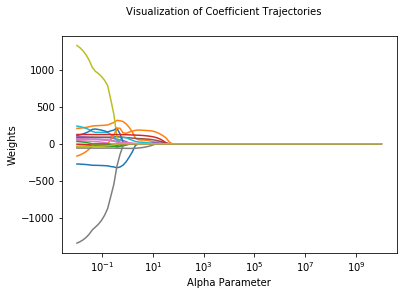

In [20]:
ax = plt.gca()
ax.plot(alphas*2, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Alpha Parameter')
plt.ylabel('Weights')
plt.suptitle("Visualization of Coefficient Trajectories", fontsize=10)

In [21]:
lassocv = LassoCV(alphas = None, 
                  cv = 10, 
                  max_iter = 100000, 
                  normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


104960.65853895503

In [34]:
# Check coefficients to determine how many Predictors are left
pd.Series(lasso.coef_, index=X.columns)

AtBat           0.000000
Hits            1.082446
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.906388
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.219367
CRuns           0.000000
CRBI            0.513975
CWalks          0.000000
PutOuts         0.368401
Assists        -0.000000
Errors         -0.000000
League_N        0.000000
Division_W    -89.064338
NewLeague_N     0.000000
dtype: float64

We see that most of the coefficients have reduced to zero - indicating that the predictors do not assist in determining player salary. After Cross-validation, we are left with 6 predictors: Hits, Walks, CHmRun, CRBI, PutOuts, and Division_W

**1.2**
Repeat with Ridge Regression. Visualize coefficient trajectories. Use cross-validation to find the optimal value fo the regression penalty.


In [0]:
from sklearn.linear_model import Ridge

In [0]:
# Create 100 alpha parameters to tune model
alphas = 10**np.linspace(start=10, stop=-2, num=100)*0.5  # Return evenly spaced numbers over a specified interval.
#alphas

In [0]:
# Store vector of ridge regression coefficients
ridge = Ridge(normalize = True)
coeffs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coeffs.append(ridge.coef_)

In [28]:
np.shape(coeffs)

(100, 1, 19)

In [0]:
ax = plt.gca()
ax.plot(alphas, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Alpha Parameter')
plt.ylabel('Weights')
plt.suptitle("Visualization of Coefficient Trajectories", fontsize=10)

In [0]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [31]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.5748784976988678

Alpha value of 0.575 results in the smallest cross-validation error when using Ridge Regression

In [32]:
ridgecv = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridgecv.fit(X_train, y_train)
mean_squared_error(y_test, ridgecv.predict(X_test))

99825.6489629273

Unlike with lasso, Ridge Regression does not reduce any of our coefficients to zero as it does not perform variable selection.

# **2. Bias-Variance Tradeoff** 
Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

**Bias** refers to how much our predictions vary from actuals, based on the amount of assumpations that are made about the form of the model. If we have higher bias, we can learn faster, but the model is less flexible and risks lower predictive power. 

Ridge Regression is an extension of Linear Regression, so it tends to have high bias. We see this in the way that Ridge Regression does not force any of our coefficients to zero - we are less flexible and keep all of the variables in Part 1.

**Variance** refers to variability between our predictions, based on how much the model changes if given different training data. Because we want the model to pick up on actual trends, and not just variation within training data, we want to minimize variance.

Lasso tends to have higher variance and results differ more based on what training data is used. However, as we see in Part 1, it results in better predictions.

Generally, as model complexity increases, we tend towards overfitting the data, resulting in lower bias and higher variance.